In [58]:
from IPython.display import HTML
from IPython.display import Image
from IPython.display import YouTubeVideo
from IPython.display import display, IFrame, Math, Latex
import scipy.stats as stats
import webbrowser
import warnings
warnings.filterwarnings("ignore")

In [3]:
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
#https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference

## Descriptive Statistics

Describe data with numerical calculations or plots. Most common descriptive statistics used in interviews are:
- Measures of centrality
- Measures of variability

Interviewers will likely provide skewed distributions to assess your comfortability of centrality metrics.

***Measures of centrality***
- Mean (Expected Value)
- Median
- Mode

***Measures of variability (Dispursion or Spread)***
- Variance 
- Standard Deviation 
- Range 


**Variance**:
    $$S^2 = \frac{\sum (x-\bar{x})^2}    {n-1}$$
    
**Standard Deviation**:
    $$S = \sqrt{\frac{\sum (x-\bar{x})^2}    {n-1}}$$

**Modality**:

Number of peaks in distribution

**Skewness**:

Measure of symmetry of distribution

### Exercise(s):

**Mean or median**

As data scientists, we often look to describe data as concisely as possible. This brings us to the two most common measures of centrality: mean and median. In this exercise, you'll examine a couple different scenarios and decide which metric is optimal for effectively describing the data.

More concretely, you'll be exploring Australian weather data containing features related to temperature and wind speeds. This dataset has already been imported as weather and both the matplotlib and pandas packages have been imported as plt and pd for you to use the rest of the chapter as well.
- Plot the distribution of the Temp3pm column using the hist() function; is the data skewed at all?


In [3]:
weather=pd.read_csv('weatherAUS.csv')[:100]

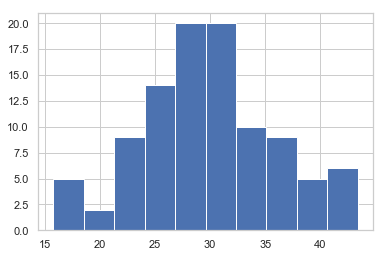

Mean: 29.78800000000001
Median: 29.55


In [4]:
# Visualize the distribution 
plt.hist(weather['Temp3pm'])
plt.show()

# Assign the mean to the variable and print the result
mean = weather['Temp3pm'].mean()
print('Mean:', mean)

# Assign the median to the variable and print the result
median = weather['Temp3pm'].median()
print('Median:', median)

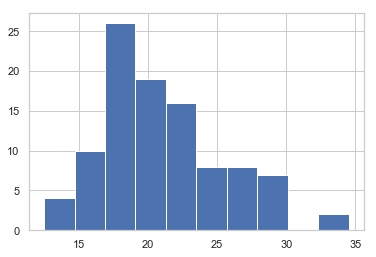

Mean: 20.972
Median: 20.65


In [5]:
# Visualize the distribution 
plt.hist(weather['Temp9am'])
plt.show()

# Assign the mean to the variable and print the result
mean = weather['Temp9am'].mean()
print('Mean:', mean)

# Assign the median to the variable and print the result
median = weather['Temp9am'].median()
print('Median:', median)

**Standard deviation by hand**

In the video, we talked about measures of variability, and discussed standard deviation as the measure that is used most commonly. It's pretty important that you have a grasp on this concept, as interviewers will likely hit on it early on in the process through a coding assignment or something more conceptual.

Here, you'll simulate this experience by computing standard deviation by hand, meaning that you won't use any existing functions like std() to get your results.

In [6]:
# Create a sample list
import math
nums = [1, 2, 3, 4, 5]

# Compute the mean of the list
mean = (1+2+3+4+5)/5

# Compute the variance and print the std of the list
variance = sum(pow(x - mean, 2) for x in nums) / len(nums)
std = variance**2
print(std)

# Compute and print the actual result from numpy
real_std = np.array(nums).std()
print(real_std)

4.0
1.4142135623730951


## Categorical data

Types of variables:
- Categorical
- Nominal
    - Order doesn't matter (ex. gender or eye color)
- Ordinal
    - Some sort of order (ex. stars in a movie review)

May need to relable values for data using label or one-hot encoding
    

### Exercise(s):

**Encoding techniques**

In the slides, we discussed two encoding techniques: label encoding and one-hot encoding. In practice, the technique that you use is determined by the situation at hand. That being said, you should have both of these at your disposal for your interview.

In this exercise, you'll practice implementing both of these techniques on the same dataset of laptop prices that you saw earlier, pre-loaded within the laptops variable.

In [100]:
laptops=pd.read_csv('laptops.csv',encoding = 'ISO-8859-1')[:100]

In [101]:
from sklearn import preprocessing

# Create the encoder and print our encoded new_vals
encoder = preprocessing.LabelEncoder()
new_vals = encoder.fit_transform(laptops['Company'])
print(new_vals)

[1 1 5 1 1 0 1 1 2 0 5 5 1 4 1 1 4 1 6 4 2 6 5 4 5 4 1 4 4 5 3 2 5 4 1 6 0
 4 5 5 2 4 2 0 4 1 6 2 4 2 6 0 5 5 0 4 5 2 7 2 4 4 6 2 5 2 5 5 6 2 8 4 4 7
 0 2 6 4 0 5 4 1 5 6 0 4 5 5 2 4 2 0 5 4 2 0 4 4 2 5]


In [102]:
# One-hot encode Company for laptops2
laptops2 = pd.get_dummies(data=laptops, columns=['Company'])
print(laptops2.head())

   Unnamed: 0      Product   TypeName  Inches  \
0           1  MacBook Pro  Ultrabook    13.3   
1           2  Macbook Air  Ultrabook    13.3   
2           3       250 G6   Notebook    15.6   
3           4  MacBook Pro  Ultrabook    15.4   
4           5  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS   
2            256GB SSD         Intel HD Graphics 620  No OS   
3 

**Exploring laptop prices**

We walked through an example in the video of surface-level data analysis of categorical variables. Here, you'll perform a similar task first-hand. Taken from the same pre-loaded laptops dataset, you'll work with three separate brands: Acer, Asus, and Toshiba.

You'll produce some initial information about the dataset, create a countplot of the companies, and analyze the relationship of each against the price in euros.

All of the usual packages have been imported for you. We've also gone ahead and imported the seaborn package as sns for you, which we'll use for visualization

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
Unnamed: 0          100 non-null int64
Company             100 non-null object
Product             100 non-null object
TypeName            100 non-null object
Inches              100 non-null float64
ScreenResolution    100 non-null object
Cpu                 100 non-null object
Ram                 100 non-null object
Memory              100 non-null object
Gpu                 100 non-null object
OpSys               100 non-null object
Weight              100 non-null object
Price_euros         100 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 10.2+ KB


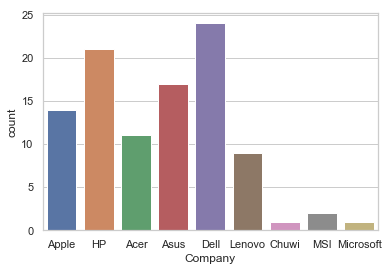

In [103]:
# Get some initial info about the data
laptops.info()

# Produce a countplot of companies
sns.countplot(laptops['Company'])
plt.show()

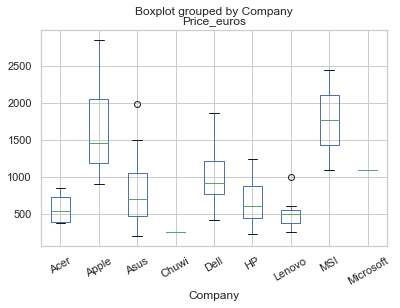

In [104]:
# Visualize the relationship with price
laptops.boxplot('Price_euros', 'Company', rot=30)
plt.show()

## Missing Data and Outliers

### Handling Missing Data
- Drop whole row
    - Could lose valuable information that could strengthen the model
- Input missing value
    - Takes more thought but allows to preserve some valuable information
    - Add a constant value
    - Replace with randomly selected record
    - Replace with Mean, Median, Mode
    - Some value estimated by another model
- Useful functions
    - isnull() : find missing values
    - dropna() : drop missing values
    - fillna() : imputation

### Dealing with Outliers
- Identify Outliers
    - Standard Deviations
        - Anything outside of 3 standard deviations
    - Interquartile Range (IQR)
        - Using Fencing and Box Plots
    - Z-scores

### Exercise(s):

**Handling null values**

Let's practice handling null values with our laptops dataset that we worked with previously. You will identify rows with null values, and then try out several techniques to address this problem.

Remember that the laptops data and the pandas package have been imported for you already.

In [113]:
laptops=pd.read_csv('laptops.csv',encoding = 'ISO-8859-1')
# Identify and print the the rows with null values
nulls = laptops[laptops.isnull().any(axis=1)]
print(nulls)

Empty DataFrame
Columns: [Unnamed: 0, Company, Product, TypeName, Inches, ScreenResolution, Cpu, Ram, Memory, Gpu, OpSys, Weight, Price_euros]
Index: []


In [114]:
# Impute constant value 0 and print the head
laptops.fillna(0, inplace=True)
print(laptops.head(3))

   Unnamed: 0 Company      Product   TypeName  Inches  \
0           1   Apple  MacBook Pro  Ultrabook    13.3   
1           2   Apple  Macbook Air  Ultrabook    13.3   
2           3      HP       250 G6   Notebook    15.6   

                     ScreenResolution                         Cpu  Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz  8GB   
1                            1440x900        Intel Core i5 1.8GHz  8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz  8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   
2            256GB SSD         Intel HD Graphics 620  No OS  1.86kg   

   Price_euros  
0      1339.69  
1       898.94  
2       575.00  


In [115]:
# Impute median price and print the head
laptops.fillna(laptops['Price_euros'].median(), inplace=True)
print(laptops.head(3))

   Unnamed: 0 Company      Product   TypeName  Inches  \
0           1   Apple  MacBook Pro  Ultrabook    13.3   
1           2   Apple  Macbook Air  Ultrabook    13.3   
2           3      HP       250 G6   Notebook    15.6   

                     ScreenResolution                         Cpu  Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz  8GB   
1                            1440x900        Intel Core i5 1.8GHz  8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz  8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   
2            256GB SSD         Intel HD Graphics 620  No OS  1.86kg   

   Price_euros  
0      1339.69  
1       898.94  
2       575.00  


In [116]:
# Drop each row with a null value and print the head
laptops.dropna(inplace=True)
print(laptops.head(3))

   Unnamed: 0 Company      Product   TypeName  Inches  \
0           1   Apple  MacBook Pro  Ultrabook    13.3   
1           2   Apple  Macbook Air  Ultrabook    13.3   
2           3      HP       250 G6   Notebook    15.6   

                     ScreenResolution                         Cpu  Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz  8GB   
1                            1440x900        Intel Core i5 1.8GHz  8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz  8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   
2            256GB SSD         Intel HD Graphics 620  No OS  1.86kg   

   Price_euros  
0      1339.69  
1       898.94  
2       575.00  


**Identifying outliers**

Let's keep at it with our laptops dataset and tackle some outliers hiding away. In this exercise, we'll stick to the first technique we discussed in the slides using standard deviations to identify extreme values, since this method is more common in practice.

You'll compute the descriptive statistics and outlier boundaries, and then identify the rows with them before dropping them from the dataset. You'll be working primarily with the Price column here.

In [123]:
# Calculate the mean and std
mean, std = laptops['Price_euros'].mean(), laptops['Price_euros'].std()

# Compute and print the upper and lower threshold
cut_off = std * 3
lower, upper = mean-cut_off, mean+cut_off
print(lower, 'to', upper)

# Identify and print rows with outliers
outliers = laptops[(laptops['Price_euros'] > upper) | (laptops['Price_euros'] < lower)]
print(outliers)

# Drop the rows from the dataset
laptops = laptops[(laptops['Price_euros'] <= upper) | (laptops['Price_euros'] >= lower)]

-973.3401360432797 to 3220.7141191591663
      Unnamed: 0 Company             Product     TypeName  Inches  \
196          200   Razer           Blade Pro       Gaming    17.3   
238          243    Asus   ROG G703VI-E5062T       Gaming    17.3   
610          617  Lenovo        Thinkpad P51     Notebook    15.6   
723          731    Dell        Alienware 17       Gaming    17.3   
744          752  Lenovo       Thinkpad P51s  Workstation    15.6   
749          758      HP            Zbook 17  Workstation    17.3   
780          789    Dell        Alienware 17       Gaming    17.3   
830          839   Razer           Blade Pro       Gaming    17.3   
1066        1081    Asus          ROG G701VO       Gaming    17.3   
1081        1096  Lenovo  IdeaPad Y900-17ISK       Gaming    17.3   
1136        1151      HP            ZBook 17  Workstation    17.3   
1231        1249   Razer           Blade Pro       Gaming    14.0   

                         ScreenResolution                    